## <b> import modules and ignore warnings

In [188]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from scipy.stats import fisher_exact
from statsmodels.stats.multitest import fdrcorrection
import os
sns.set_theme(style="darkgrid")
import warnings
warnings.filterwarnings("ignore")
import networkx as nx

In [189]:
path=('/home/anuradha/Documents/anu/phd_project/TA-SYSTEMS/TA_systems_clean/set1/other_geneticcoordinates/bacant')

In [190]:
strain_list=os.listdir(path)

In [191]:
len(strain_list)

950

## Integron analysis

In [192]:
int_df=pd.DataFrame(columns=['Strain','Integrons'])

In [193]:
int_df.head()

,Strain,Integrons


In [194]:
for i in strain_list:
    new_path=path+'/'+i+'/integrons.detail.tsv'
    temp=pd.read_csv(new_path, sep='\t')
    if temp.empty:
        int_df=int_df.append({'Strain':i, 'Integrons':'None'}, ignore_index=True)
    else:
        xx=temp['ID_integron'].unique().tolist()
        #print(xx)
        int_df=int_df.append({'Strain':i, 'Integrons':xx}, ignore_index=True)
   

In [195]:
int_df.head()

,Strain,Integrons
0,ST000690050,None
1,ST004100094,None
2,ST000950376,None
3,ST001550161,None
4,ST000690056,None


In [196]:
#int_df.to_csv('Integron-information.csv',index=False, sep='\t')

In [197]:
int_set=set()

for i in strain_list:
    new_path=path+'/'+i+'/integrons.detail.tsv'
    temp=pd.read_csv(new_path, sep='\t')
    if not temp.empty:
        xx=temp['ID_integron'].tolist()
        #print(xx)
        for j in xx:
            int_set.add(j)
            #print(int_set)

int_list=list(int_set)
      

In [198]:
int_list

['integron_04', 'integron_01', 'integron_02', 'integron_03']

In [199]:
d = pd.DataFrame(0, index=strain_list, columns=int_list)
d.head()

,integron_04,integron_01,integron_02,integron_03
ST000690050,0,0,0,0
ST004100094,0,0,0,0
ST000950376,0,0,0,0
ST001550161,0,0,0,0
ST000690056,0,0,0,0


In [200]:
d.shape

(950, 4)

In [201]:
for k in strain_list:
    new_path=path+'/'+k+'/integrons.detail.tsv'
    temp=pd.read_csv(new_path, sep='\t')
    if not temp.empty:
        xx=temp['ID_integron'].tolist()
        xy=set()
        for l in xx:
            
            xy.add(l)
        
        xy_list=list(xy)
  
        for m in xy_list:
            d.at[k,m]=1      

In [202]:
d.head()

,integron_04,integron_01,integron_02,integron_03
ST000690050,0,0,0,0
ST004100094,0,0,0,0
ST000950376,0,0,0,0
ST001550161,0,0,0,0
ST000690056,0,0,0,0


In [203]:
p_d=d.copy()
#Add ST column
#p_d['ST'] = d.index.str[2:-4].astype(int)
p_d.head()

,integron_04,integron_01,integron_02,integron_03
ST000690050,0,0,0,0
ST004100094,0,0,0,0
ST000950376,0,0,0,0
ST001550161,0,0,0,0
ST000690056,0,0,0,0


In [204]:
p_d.to_csv('integron_strainwise_presenceabsence.csv', sep='\t')

## <b> load and read integrons data

In [205]:
## read plasmid data
integron  = pd.read_csv('/home/anuradha/Documents/anu/phd_project/TA-SYSTEMS/TA_systems_clean/set1/other_geneticcoordinates/integron_strainwise_presenceabsence.csv', sep = '\t')
print("Shape of the dataframe is", integron.shape)

print('-------------------------------------------')
print(integron.columns)
print('-------------------------------------------')
integron.head()

Shape of the dataframe is (950, 5)
-------------------------------------------
Index(['Unnamed: 0', 'integron_04', 'integron_01', 'integron_02',
       'integron_03'],
      dtype='object')
-------------------------------------------


,Unnamed: 0,integron_04,integron_01,integron_02,integron_03
0,ST000690050,0,0,0,0
1,ST004100094,0,0,0,0
2,ST000950376,0,0,0,0
3,ST001550161,0,0,0,0
4,ST000690056,0,0,0,0


In [206]:
integron.columns

Index(['Unnamed: 0', 'integron_04', 'integron_01', 'integron_02',
       'integron_03'],
      dtype='object')

In [207]:
integron.rename(columns = {'Unnamed: 0':'Strain'}, inplace = True)
integron.head()

,Strain,integron_04,integron_01,integron_02,integron_03
0,ST000690050,0,0,0,0
1,ST004100094,0,0,0,0
2,ST000950376,0,0,0,0
3,ST001550161,0,0,0,0
4,ST000690056,0,0,0,0


In [208]:
integron_df = integron.copy()

## <b> Load and read toxin data

In [209]:
toxin = pd.read_csv('hits.csv')
print("Shape of the toxin dataframe is", toxin.shape)
print('-------------------------------------------')
print(toxin.columns)
print('-------------------------------------------')
toxin.head()

Shape of the toxin dataframe is (950, 170)
-------------------------------------------
Index(['Strain', '1H-CbtA_toxin', '2H-Cpta_toxin', '3H-Polyketide_cyc2',
       '4H-Fic', '5H-GNAT_acetyltran', '6H-GNAT_acetyltran', '7H-GnsAB_toxin',
       '8H-Toxin_YhaV', '9H-YdaT_toxin',
       ...
       '160H-Zeta_toxin', '161H-CbtA_toxin', '162H-Couple_hipA', '163H-ANT',
       '164H-Zeta_toxin', '165H-HipA_C', '166H-Gp49', '167H-DUF4258',
       '168H-PIN', '169H-PemK_toxin'],
      dtype='object', length=170)
-------------------------------------------


,Strain,1H-CbtA_toxin,2H-Cpta_toxin,3H-Polyketide_cyc2,4H-Fic,5H-GNAT_acetyltran,6H-GNAT_acetyltran,7H-GnsAB_toxin,8H-Toxin_YhaV,9H-YdaT_toxin,...,160H-Zeta_toxin,161H-CbtA_toxin,162H-Couple_hipA,163H-ANT,164H-Zeta_toxin,165H-HipA_C,166H-Gp49,167H-DUF4258,168H-PIN,169H-PemK_toxin
0,ST001670050,2,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,ST006480109,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,ST000730234,2,1,1,1,1,1,1,1,3,...,0,0,0,0,0,0,0,0,0,0
3,ST000580141,0,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,ST000380050,2,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


## <b> Fisher exact test


In [210]:
merged_df = pd.merge(integron_df, toxin, on='Strain', how = 'left' )

In [211]:
integron_df = integron_df.set_index('Strain')

In [212]:
toxin = toxin.set_index('Strain')

In [213]:
# set the significance level
alpha = 0.01

# create a dictionary to store the co-occurring AMR genes for each toxin gene
co_occurrence_dict = {}

In [214]:
# iterate through each toxin gene
for toxin_gene in toxin.columns:
    # create a list to store the co-occurring AMR genes for this toxin gene
    co_integron = []
    # count the number of strains that have the toxin gene
    toxin_count = (toxin[toxin_gene] == 1).sum()
    
    # iterate through each AMR gene
    for integron in integron_df.columns:
        # count the number of strains that have both the AMR gene and the toxin gene
        co_count = ((merged_df[integron] == 1) & (merged_df[toxin_gene] == 1)).sum()
        
        # perform Fisher's exact test to calculate the p-value
        # for the hypothesis that the occurrence of the AMR gene is greater in strains with the toxin gene
        p_value = fisher_exact([[co_count, toxin_count - co_count], [(integron_df[integron] == 1).sum() - co_count, ((merged_df[integron] != 1) & (merged_df[toxin_gene] == 1)).sum()]], alternative='greater')[1]
        
        # adjust the p-value for multiple testing using the false discovery rate (FDR) method
        p_value_adj = fdrcorrection([p_value], alpha=alpha)[1][0]
        
        # if the adjusted p-value is significant, add the AMR gene to the list for this toxin gene
        if p_value_adj < alpha:
            co_integron.append(integron)
    
    # store the list of co-occurring AMR genes in the dictionary
    co_occurrence_dict[toxin_gene] = co_integron

In [215]:
co_occurrence_dict

{'1H-CbtA_toxin': [],
 '2H-Cpta_toxin': ['integron_01', 'integron_02'],
 '3H-Polyketide_cyc2': ['integron_01', 'integron_02'],
 '4H-Fic': ['integron_01', 'integron_02'],
 '5H-GNAT_acetyltran': ['integron_01', 'integron_02'],
 '6H-GNAT_acetyltran': ['integron_01', 'integron_02'],
 '7H-GnsAB_toxin': ['integron_01', 'integron_02'],
 '8H-Toxin_YhaV': ['integron_01', 'integron_02'],
 '9H-YdaT_toxin': [],
 '10H-HipA_C-Couple_hipA': ['integron_01', 'integron_02'],
 '11H-HD': ['integron_01', 'integron_02'],
 '12H-YoeB_toxin': ['integron_01', 'integron_02'],
 '13H-PemK_toxin': ['integron_01', 'integron_02'],
 '14H-HicA_toxin': ['integron_01', 'integron_02'],
 '15H-CcdB': [],
 '16H-YafO_toxin': [],
 '17H-YdaT_toxin': [],
 '18H-PemK_toxin': [],
 '19H-PIN': [],
 '20H-CcdB': [],
 '21H-YafQ_toxin': [],
 '22H-PemK_toxin': [],
 '23H-RelE': [],
 '24H-HigB_toxin': [],
 '25H-ParE_toxin': [],
 '26H-MqsR_toxin': [],
 '27H-RelE': [],
 '28H-HigB-like_toxin': [],
 '29H-PIN': [],
 '30H-HigB-like_toxin': [],
 '

In [266]:
# Create an empty dataframe with columns for toxins and plasmids
df = pd.DataFrame(columns=['toxins', 'integron'])

# Loop through each key-value pair in your dictionary
for toxin, integron in co_occurrence_dict.items():
    # Create a new row with the toxin in the first column and a list of AMR genes in the second column
    new_row = {'toxins': toxin, 'integron': integron}
    #print(new_row)
    # Add the new row to the dataframe
    df = df.append(new_row, ignore_index=True)
    
# Display the resulting dataframe
df.head()

,toxins,integron
0,1H-CbtA_toxin,[]
1,2H-Cpta_toxin,"[integron_01, integron_02]"
2,3H-Polyketide_cyc2,"[integron_01, integron_02]"
3,4H-Fic,"[integron_01, integron_02]"
4,5H-GNAT_acetyltran,"[integron_01, integron_02]"


In [267]:
df['Count_integrons'] = [len(c) for c in df['integron']]

In [268]:
df.head()

,toxins,integron,Count_integrons
0,1H-CbtA_toxin,[],0
1,2H-Cpta_toxin,"[integron_01, integron_02]",2
2,3H-Polyketide_cyc2,"[integron_01, integron_02]",2
3,4H-Fic,"[integron_01, integron_02]",2
4,5H-GNAT_acetyltran,"[integron_01, integron_02]",2


In [269]:
df.shape

(169, 3)

In [270]:
df.to_csv('cooccur_integrons', index=None)

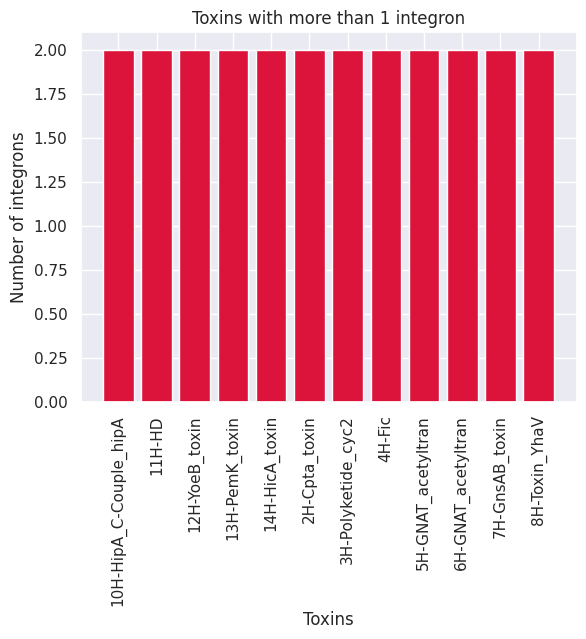

In [217]:
# Define your threshold
threshold = 1

# Create a pandas series from the dictionary, with AMR genes as values and toxins as indices
amr_series = pd.Series(co_occurrence_dict).explode()

# Count the number of AMR genes for each toxin
toxin_counts = amr_series.groupby(level=0).count()

# Filter the counts based on your threshold
toxin_counts_filtered = toxin_counts[toxin_counts >= threshold]

# Plot the barplot
plt.bar(toxin_counts_filtered.index, toxin_counts_filtered.values, color = 'crimson')
plt.xlabel('Toxins')
# Rotating X-axis labels
plt.xticks(rotation = 90)
plt.ylabel('Number of integrons')
plt.title(f'Toxins with more than {threshold} integron')
plt.show()